(0.0, 1.0)

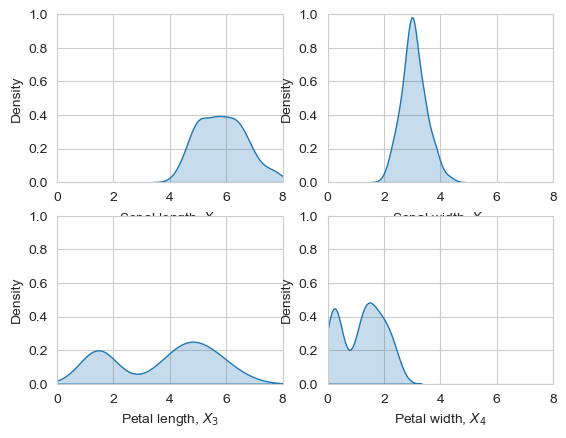

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_iris

# Load the iris data
iris = load_iris()
# A copy from Sklearn

X = iris.data
y = iris.target

feature_names = ['Sepal length, $X_1$','Sepal width, $X_2$',
                 'Petal length, $X_3$','Petal width, $X_4$']

# Convert X array to dataframe
X_df = pd.DataFrame(X, columns=feature_names)

# KDE

fig, axes = plt.subplots(2,2)

# 概率密度估计
sns.kdeplot(data=X_df,fill=True, x = feature_names[0], ax = axes[0][0])
axes[0][0].set_xlim([0,8]); axes[0][0].set_ylim([0,1])
sns.kdeplot(data=X_df,fill=True, x = feature_names[1], ax = axes[0][1])
axes[0][1].set_xlim([0,8]); axes[0][1].set_ylim([0,1])
sns.kdeplot(data=X_df,fill=True, x = feature_names[2], ax = axes[1][0])
axes[1][0].set_xlim([0,8]); axes[1][0].set_ylim([0,1])
sns.kdeplot(data=X_df,fill=True, x = feature_names[3], ax = axes[1][1])
axes[1][1].set_xlim([0,8]); axes[1][1].set_ylim([0,1])

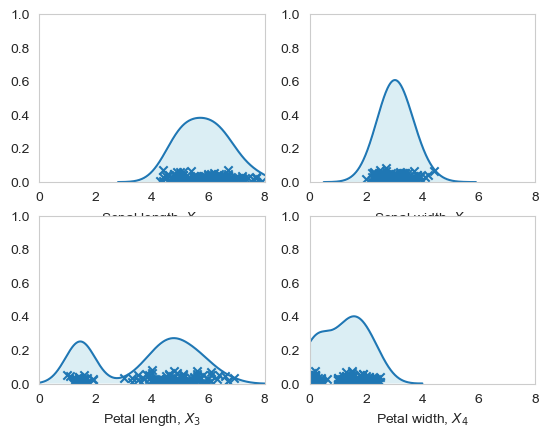

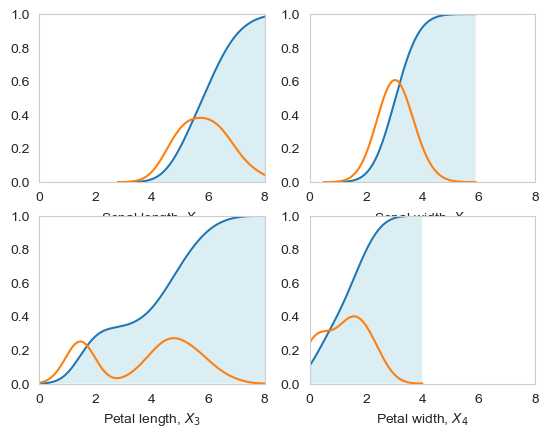

In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.datasets import load_iris

plt.close('all')

iris = load_iris()
# A copy from Sklearn

X = iris.data
y = iris.target

feature_names = ['Sepal length, $X_1$','Sepal width, $X_2$',
                 'Petal length, $X_3$','Petal width, $X_4$']

# Convert X array to dataframe
X_df = pd.DataFrame(X, columns=feature_names)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

axs = [ax1, ax2, ax3, ax4]

for name, ax in zip(feature_names, axs):
    
    df = X_df[name]
    # 创建单变量核密度估计对象
    KDE = sm.nonparametric.KDEUnivariate(df)
    # 拟合模型
    KDE.fit(bw=0.5) # 0.1, 0.2, 0.4
    # 填充核密度曲线下的区域
    # KDE.support是KDE估计的支持区间（即数据的范围），KDE.density是在该区间上估计的密度值
    ax.fill_between(KDE.support, KDE.density, facecolor = '#DBEEF4')
    ax.plot(KDE.support, KDE.density)
    ax.scatter(df,0.03*np.abs(np.random.randn(df.size)),marker = 'x')

    ax.grid()
    ax.autoscale(enable=True, axis='x', tight=True)
    ax.autoscale(enable=True, axis='y', tight=True)
    ax.set_ylim([0,1])
    ax.set_xlim([0,8])
    ax.set_xlabel(name)


# Cumulative distribution
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

axs = [ax1, ax2, ax3, ax4]

for name, ax in zip(feature_names, axs):
    
    df = X_df[name]
    # 创建单变量核密度估计对象
    KDE = sm.nonparametric.KDEUnivariate(df)
    # 拟合
    KDE.fit(bw=0.5) # 0.1, 0.2, 0.4
    # 填充
    ax.fill_between(KDE.support, KDE.cdf, facecolor = '#DBEEF4')
    # 绘制 CDF 值
    ax.plot(KDE.support, KDE.cdf)
    ax.plot(KDE.support, KDE.density)

    ax.grid()
    ax.autoscale(enable=True, axis='x', tight=True)
    ax.autoscale(enable=True, axis='y', tight=True)
    ax.set_ylim([0,1])
    ax.set_xlim([0,8])
    ax.set_xlabel(name)

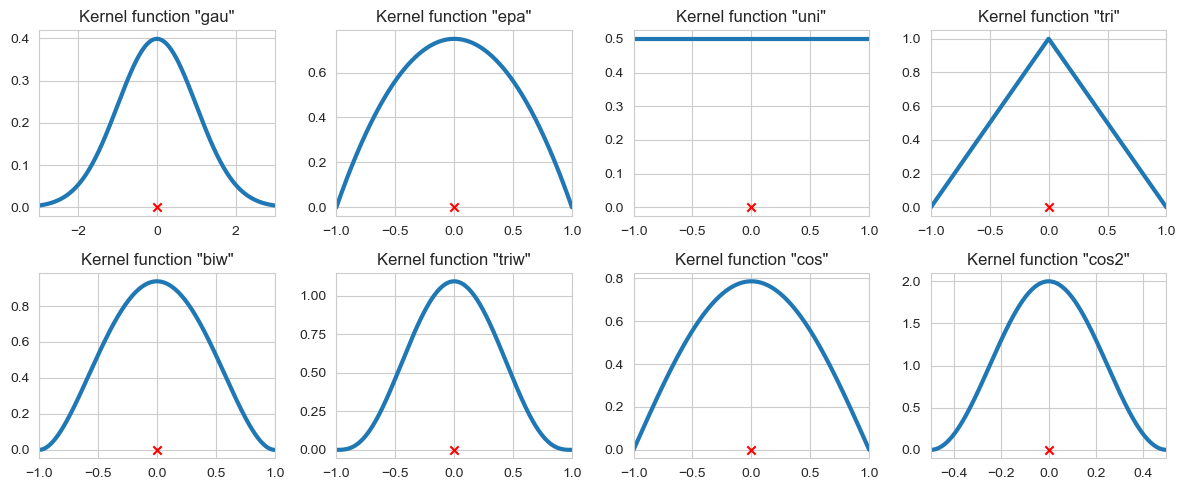

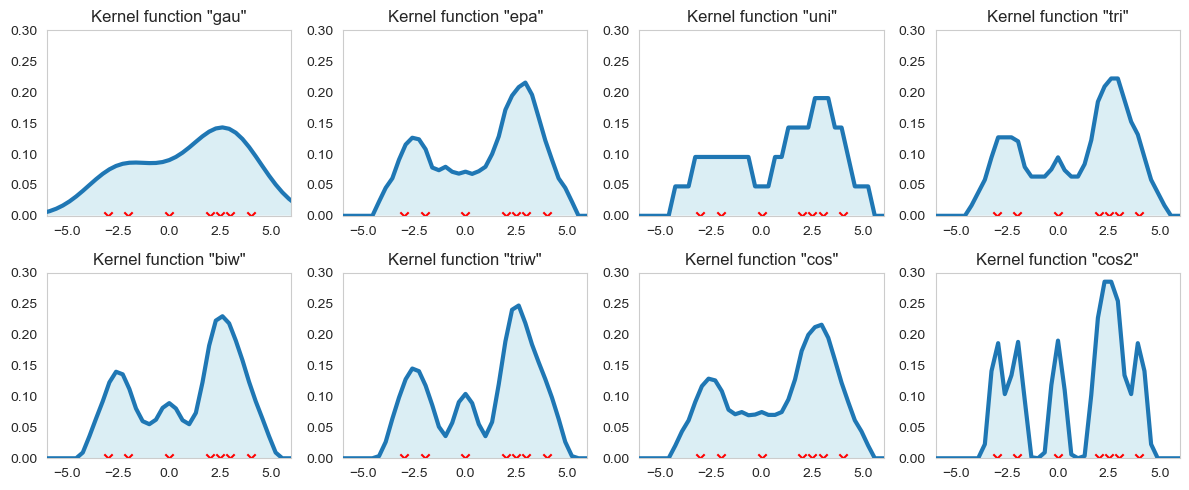

In [3]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from statsmodels.nonparametric.kde import kernel_switch  
# statsmodels 是一个Python库，用于估计许多不同统计模型
# kernel_switch 函数通常用于自动选择核密度估计中的核函数和带宽

from itertools import islice
# 迭代器

list(kernel_switch.keys())

# Create a figure
fig = plt.figure(figsize=(12, 5))

# Enumerate every option for the kernel
for i, (ker_name, ker_class) in enumerate(islice(kernel_switch.items(),8)):
    # 迭代 kernel_switch 中的前八个条目
    
    # Initialize the kernel object
    # 初始化核函数对象
    kernel = ker_class()
    
    # Sample from the domain
    # 设置有效输入范围
    domain = kernel.domain or [-3, 3]
    # 生成均匀数据点
    x_vals = np.linspace(*domain, num=2**10)
    # 计算核函数的值
    y_vals = kernel(x_vals)

    # Create a subplot, set the title
    ax = fig.add_subplot(2, 4, i + 1)
    ax.set_title('Kernel function "{}"'.format(ker_name))
    ax.plot(x_vals, y_vals, lw=3, label='{}'.format(ker_name))
    ax.scatter([0], [0], marker='x', color='red')
    plt.grid(True, zorder=-5)
    ax.set_xlim(domain)
    
plt.tight_layout()

data = [-3,-2,0,2,2.5,3,4]
# 创建了一个单变量的 KDE 模型对象，用给定的数据进行核密度估计
kde = sm.nonparametric.KDEUnivariate(data)

# Create a figure
fig = plt.figure(figsize=(12, 5))

# Enumerate every option for the kernel
for i, kernel in enumerate(islice(kernel_switch.keys(),8)):
    
    # Create a subplot, set the title
    ax = fig.add_subplot(2, 4, i + 1)
    ax.set_title('Kernel function "{}"'.format(kernel))
    
    # Fit the model (estimate densities)
    # 拟合核函数
    kde.fit(kernel=kernel, fft=False, bw=1.5)
    
    # 填充
    ax.fill_between(kde.support, kde.density, facecolor = '#DBEEF4')
    # 绘制核密度曲线
    ax.plot(kde.support, kde.density, lw=3, label='KDE from samples', zorder=10)
    ax.scatter(data, np.zeros_like(data), marker='x', color='red')
    plt.grid()
    ax.set_xlim([-6, 6])
    ax.set_ylim([0, 0.3])
    
plt.tight_layout()

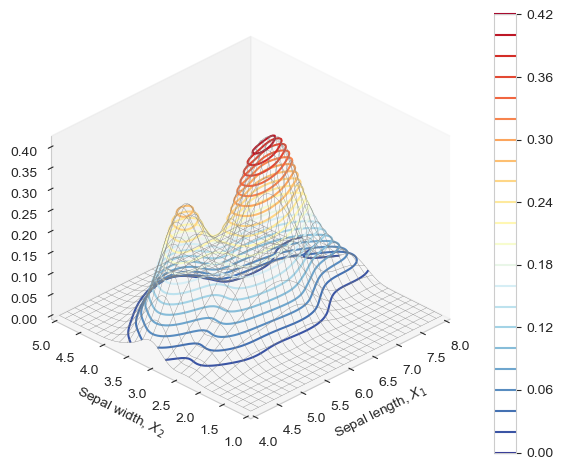

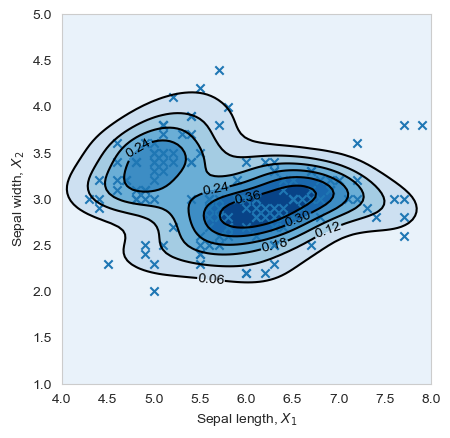

In [4]:
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.datasets import load_iris

plt.close('all')

iris = load_iris()
# A copy from Sklearn

X = iris.data
x = X[:, 0]
y = X[:, 1]


xmin, xmax = 4, 8
ymin, ymax = 1, 5

# Perform the kernel density estimate
# np.mgrid 用于直接生成坐标点
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
# 将数组按垂直方向堆叠
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
# 创建高斯核密度估计对象
kernel = st.gaussian_kde(values)
# 计算核密度估计在所有网格点上的值
PDF_xy = np.reshape(kernel(positions).T, xx.shape)


fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.plot_wireframe(xx,yy, PDF_xy, 
                  rstride=4, cstride=4,
                  color = [0.5,0.5,0.5],
                  linewidth = 0.25)


colorbar = ax.contour(xx,yy, PDF_xy,20,
             cmap = 'RdYlBu_r')

fig.colorbar(colorbar, ax=ax)

ax.set_xlabel('Sepal length, $X_1$')
ax.set_ylabel('Sepal width, $X_2$')
ax.set_zlabel('$f_{X1,X2}(x_1,x_2)$')

ax.set_proj_type('ortho')
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])
ax.view_init(azim=-135, elev=30)
ax.grid(False)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
# ax.set_zlim(0, 0.7)
plt.tight_layout()

plt.show()


fig = plt.figure()
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Contourf plot
cfset = ax.contourf(xx, yy, PDF_xy, cmap='Blues')
cset = ax.contour(xx, yy, PDF_xy, colors='k')
plt.scatter(x,y,marker = 'x')

# Label plot
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('Sepal length, $X_1$')
ax.set_ylabel('Sepal width, $X_2$')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

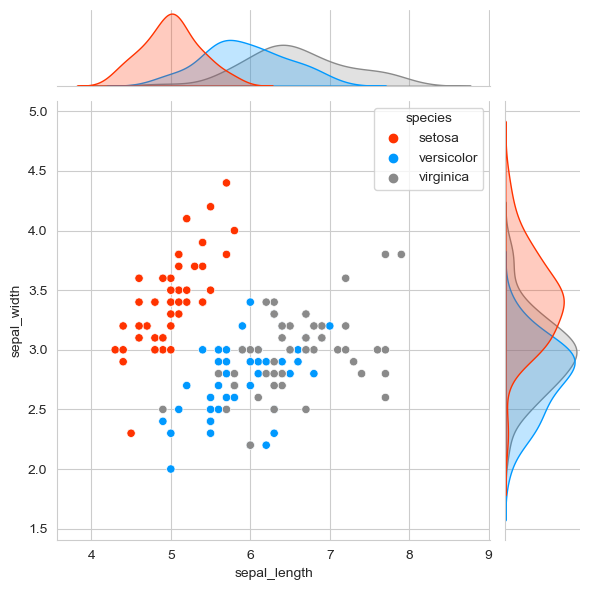

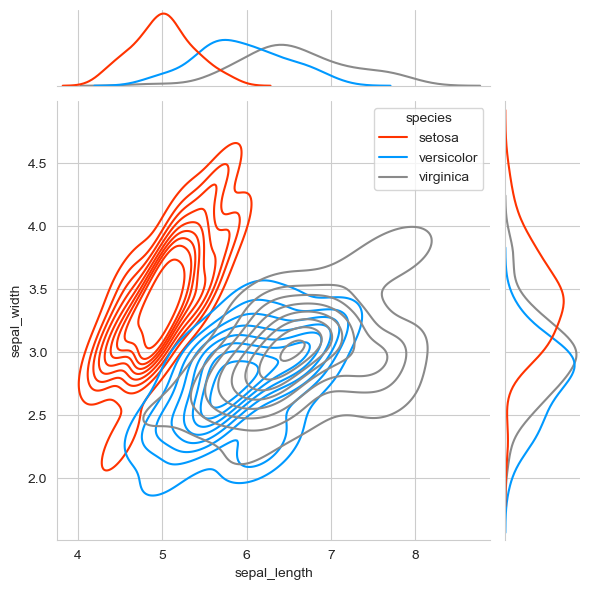

In [5]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
import scipy.stats as st

import seaborn as sns

# Load the iris data
iris_sns = sns.load_dataset("iris")
# A copy from Seaborn

sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", hue='species',
              palette={'setosa': '#FF3300', 'versicolor': '#0099FF', 'virginica': '#8A8A8A'})

sns.jointplot(data=iris_sns, x="sepal_length", y="sepal_width", hue='species',
              kind="kde",
              palette={'setosa': '#FF3300', 'versicolor': '#0099FF', 'virginica': '#8A8A8A'})